# Load Data

In [1]:
import pandas as pd

Data = pd.read_csv('samples.csv')
Data

,'Elapsed time','ECG I','ECG I filtered'
0,'hh:mm:ss.mmm','mV','mV'
1,'0:00.000',-0.085,-0.115
2,'0:00.002',-0.080,-0.115
3,'0:00.004',-0.070,-0.120
4,'0:00.006',-0.075,-0.120
...,...,...,...
4996,'0:09.990',0.015,0.095
4997,'0:09.992',0.030,0.095
4998,'0:09.994',0.020,0.095
4999,'0:09.996',0.035,0.095


# Detect R-Peaks

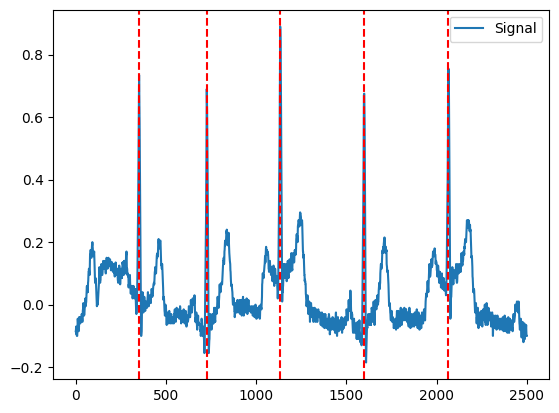

In [2]:
import numpy as np
import neurokit2 as nk

sfreq = 500
ecg_signal = np.array(list(map(float, Data["'ECG I'"].values[1:])))
TIME = np.array(list(range(ecg_signal.shape[0]))) / sfreq

_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=sfreq)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:2500])

In [3]:
rpeaks['ECG_R_Peaks']

array([ 351,  726, 1133, 1598, 2065, 2524, 2991, 3435, 3868, 4292, 4706])

# Locate other waves (P, Q, S, T) and their onset and offset

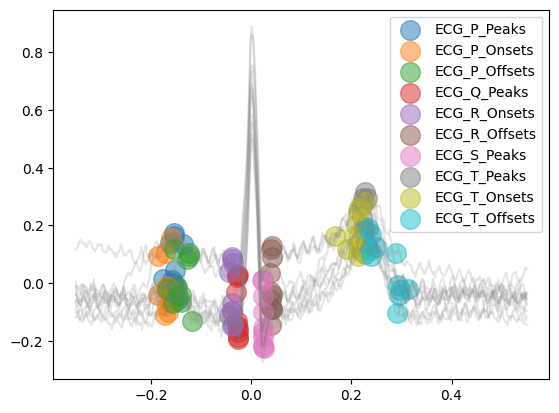

In [4]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=sfreq, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='all')

In [5]:
waves_dwt

{'ECG_P_Peaks': [270,
  638,
  1056,
  1522,
  1988,
  2445,
  2923,
  3360,
  3788,
  4214,
  4632],
 'ECG_P_Onsets': [265,
  633,
  1040,
  1518,
  1985,
  2439,
  2907,
  3354,
  3782,
  4208,
  4623],
 'ECG_P_Offsets': [274,
  642,
  1071,
  1528,
  2003,
  2450,
  2927,
  3365,
  3790,
  4219,
  4647],
 'ECG_Q_Peaks': [336,
  713,
  1119,
  1584,
  2052,
  2510,
  2977,
  3422,
  3855,
  4279,
  nan],
 'ECG_R_Onsets': [329,
  707,
  1114,
  1579,
  2047,
  2505,
  2972,
  3417,
  3846,
  4273,
  nan],
 'ECG_R_Offsets': [369,
  745,
  1153,
  1617,
  2085,
  2544,
  3010,
  3455,
  3887,
  4312,
  4725],
 'ECG_S_Peaks': [362,
  737,
  1144,
  1609,
  2076,
  2535,
  3001,
  3446,
  3880,
  4303,
  nan],
 'ECG_T_Peaks': [462,
  836,
  1244,
  1710,
  2175,
  2637,
  3104,
  3550,
  3983,
  4405,
  4819],
 'ECG_T_Onsets': [453,
  830,
  1239,
  1693,
  2172,
  2630,
  3074,
  3544,
  3981,
  4398,
  4815],
 'ECG_T_Offsets': [475,
  842,
  1279,
  1717,
  2213,
  2671,
  3147,
  3553,

# Validate T-peaks Accuracy

In [6]:
R_true = np.array([
    352,
    727,
    1135,
    1599,
    2067,
    2525,
    2992,
    3436,
    3870,
    4293,
])

T_true = np.array([
    469,
    839,
    1246,
    1715,
    2183,
    2638,
    3109,
    3556,
    3980,
    4407,
])

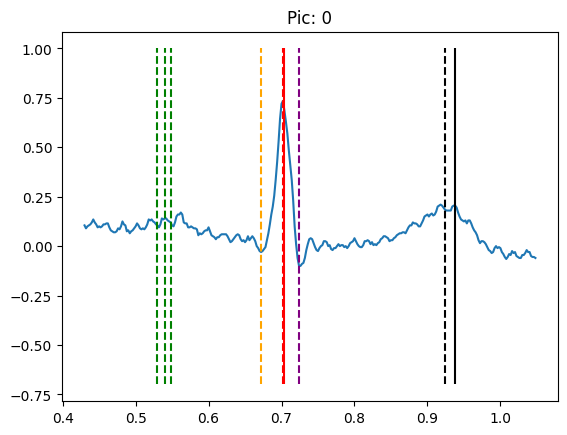

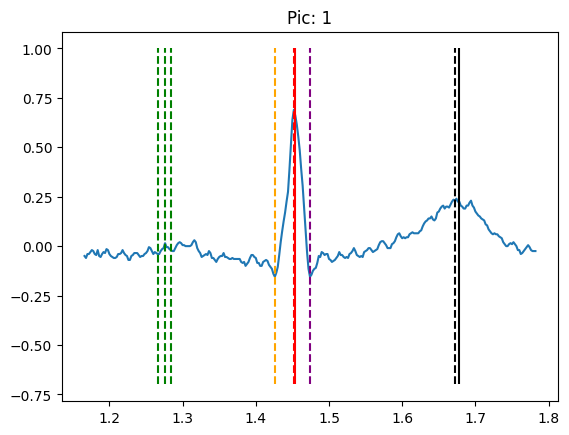

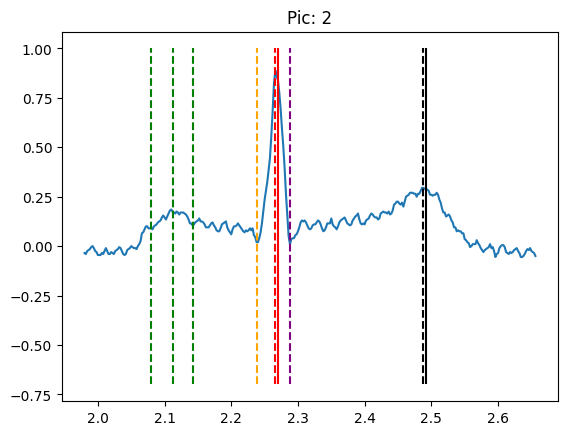

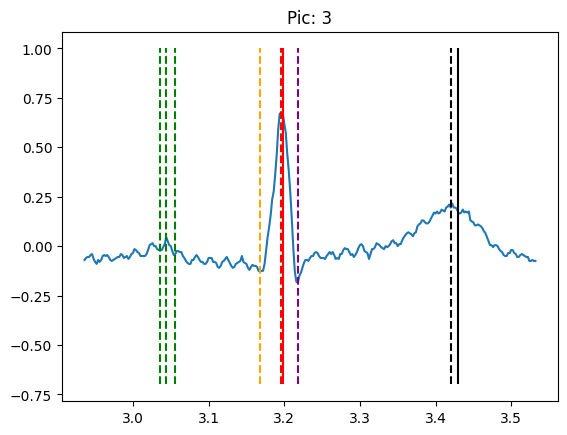

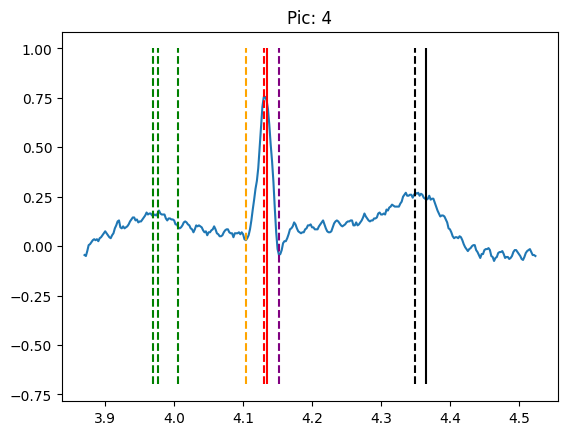

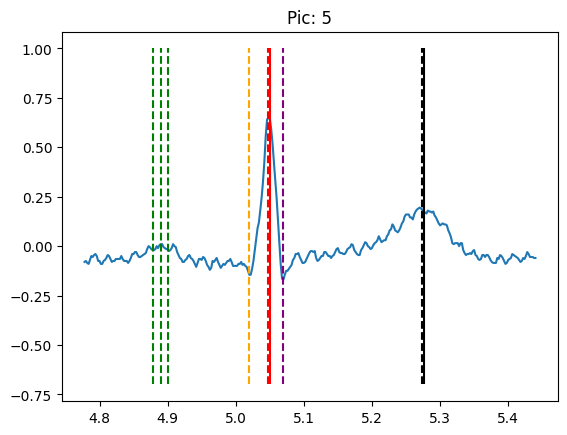

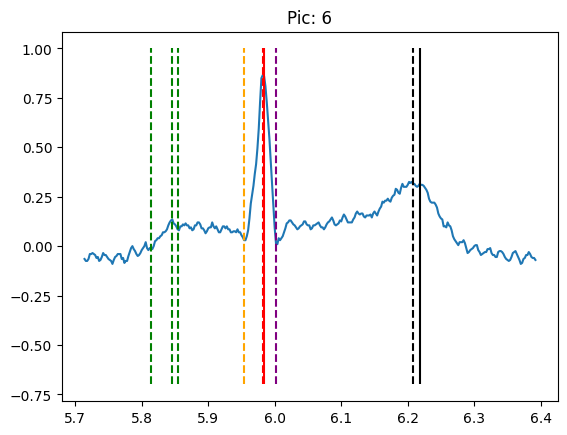

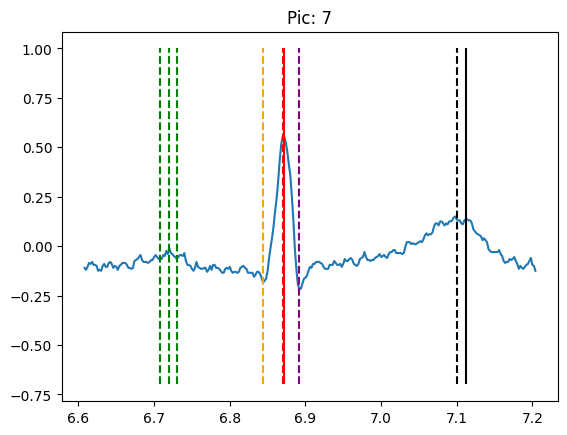

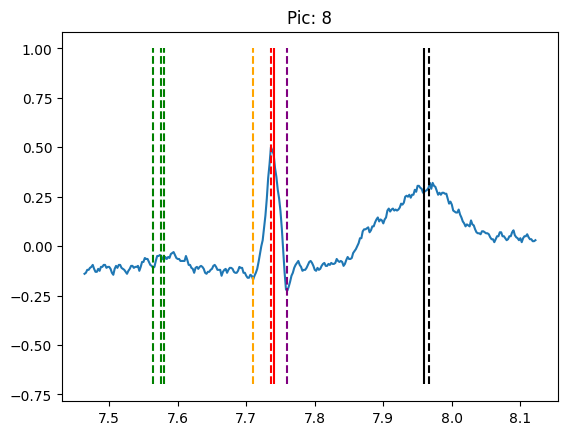

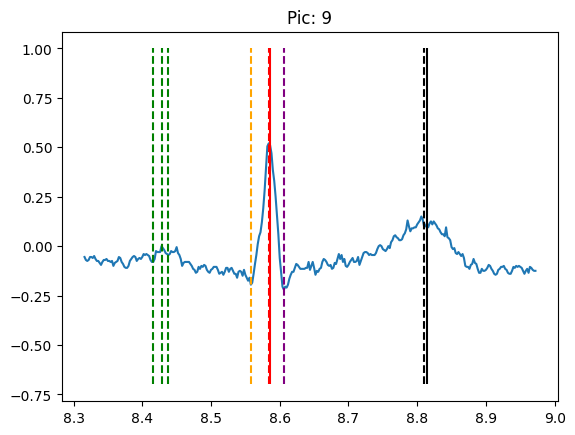

In [7]:
from matplotlib import pyplot as plt

for i in range(10):
    fig, ax = plt.subplots()
    mystart = waves_dwt['ECG_P_Onsets'][i] - 50
    myend = waves_dwt['ECG_T_Offsets'][i] + 50
    ax.set_title("Pic: %d"%i)
    # plot signal
    ax.plot(TIME[mystart:myend], ecg_signal[mystart:myend])
    # R
    ax.vlines(rpeaks['ECG_R_Peaks'][i] / sfreq, -0.7, 1, linestyles='dashed', colors='red')
    ax.vlines(R_true[i] / sfreq, -0.7, 1, colors='red')

    # P
    ax.vlines(waves_dwt['ECG_P_Onsets'][i] / sfreq, -0.7, 1, linestyles='dashed', colors='green')
    ax.vlines(waves_dwt['ECG_P_Peaks'][i] / sfreq, -0.7, 1, linestyles='dashed', colors='green')
    ax.vlines(waves_dwt['ECG_P_Offsets'][i] / sfreq, -0.7, 1, linestyles='dashed', colors='green')

    # Q
    ax.vlines(waves_dwt['ECG_Q_Peaks'][i] / sfreq, -0.7, 1, linestyles='dashed', colors='orange')

    # S
    ax.vlines(waves_dwt['ECG_S_Peaks'][i] / sfreq, -0.7, 1, linestyles='dashed', colors='purple')

    # T
    #ax.vlines(waves_dwt['ECG_T_Onsets'][i] / sfreq, -0.7, 1, linestyles='dashed', colors='black')
    ax.vlines(waves_dwt['ECG_T_Peaks'][i] / sfreq, -0.7, 1, linestyles='dashed', colors='black')
    #ax.vlines(waves_dwt['ECG_T_Offsets'][i] / sfreq, -0.7, 1, linestyles='dashed', colors='black')
    ax.vlines(T_true[i] / sfreq, -0.7, 1, colors='black')

In [8]:
print("R error: ")
print("---------------------------------------------------")
err = np.abs(R_true - rpeaks['ECG_R_Peaks'][:-1]) / sfreq
print(err)
print("---------------------------------------------------")
print(np.mean(err))

R error: 
---------------------------------------------------
[0.002 0.002 0.004 0.002 0.004 0.002 0.002 0.002 0.004 0.002]
---------------------------------------------------
0.0026000000000000003


In [9]:
print("T error: ")
print("---------------------------------------------------")
err = np.abs(T_true - waves_dwt['ECG_T_Peaks'][:-1]) / sfreq
print(err)
print("---------------------------------------------------")
print(np.mean(err))

T error: 
---------------------------------------------------
[0.014 0.006 0.004 0.01  0.016 0.002 0.01  0.012 0.006 0.004]
---------------------------------------------------
0.008400000000000001
